In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/capstone project data/healthcare dataset/Health_care.csv")
data.head(3)

,Product_id,description,title,imUrl,related,salesRank,categories,price,brand,reviewerID,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,B0059IU3TG,Absonutrix Fucoxanthin Topical Thermogenic Sli...,Absonutrix Fucoxanthin Slim Patches - 30 Patch...,http://ecx.images-amazon.com/images/I/614vz80j...,"{'also_bought': ['B0059IAWNI', 'B005FYO4OE', '...",36711,"[['Health & Personal Care', 'Vitamins & Dietar...",15.95,Absonutrix Fucoxanthin Patch,A1L7MPGNGTCDOG,...,2014-02-12,Negative,0,0,0.0,0.000,1.000,0.000,0.0000,20
1,B001AJ6YS2,The fully washable Philips Norelco 7310XL Men'...,Philips Norelco 7310 Men's Shaving System,http://ecx.images-amazon.com/images/I/31kbFfBR...,"{'also_bought': ['B000068PBT', 'B001AJ8YGC', '...",15682,"[['Health & Personal Care', 'Personal Care', '...",79.99,Philips,AM12RRYC66CO1,...,2012-03-11,Negative,0,2,0.0,0.139,0.839,0.022,-0.7896,50
2,B00AYV59WY,NaN,"Scott Extra Soft Bath Tissue Mega Roll, 12 Cou...",http://ecx.images-amazon.com/images/I/51OI%2BI...,"{'also_bought': ['B00HFQ2T06', 'B00BGN8PLG', '...",1517,"[['Health & Personal Care', 'Household Supplie...",23.99,SCOTT,A3CTL2OU26LA5A,...,2013-12-11,Negative,0,1,0.0,0.128,0.872,0.000,-0.6635,54


In [4]:
data.isnull().sum()

Product_id            0
description       80130
title                 0
imUrl                 0
related               0
salesRank             0
categories            0
price                 0
brand                 4
reviewerID            0
reviewerName         38
reviewText           77
overall               0
summary              10
unixReviewTime        0
reviewTime            0
sentiment             0
Helpful               0
Not_helpful           0
helpful_rate          0
neg                   0
neu                   0
pos                   0
polarity              0
word_count            0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

Product_id        0
description       0
title             0
imUrl             0
related           0
salesRank         0
categories        0
price             0
brand             0
reviewerID        0
reviewerName      0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
sentiment         0
Helpful           0
Not_helpful       0
helpful_rate      0
neg               0
neu               0
pos               0
polarity          0
word_count        0
dtype: int64

******************************

In [7]:
d= data[:10000]

# kmeans

In [8]:
df_cl2 = data[['helpful_rate','overall']][:10000]

In [9]:
from sklearn.cluster import KMeans

In [10]:
import matplotlib.pyplot as plt

246.40189964620652
70.7251596767951
31.904630133114253
15.24633608683881
9.819675637146034
6.410173744447832
4.711021049107256
3.5104966077779904


Text(0.5, 1.0, 'Elbow curve')

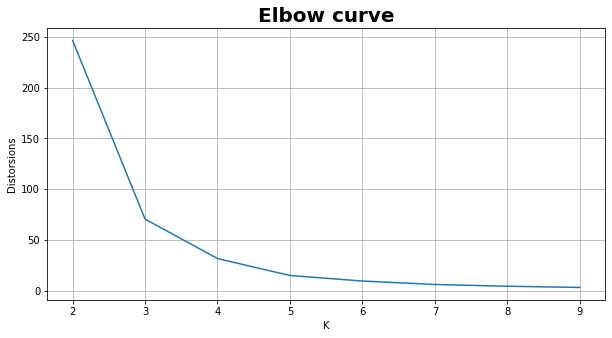

In [11]:
distortion =[]
for k in range (2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_cl2)
    print(kmeans.inertia_)
    distortion.append(kmeans.inertia_)
    
plt.figure(figsize=(10,5))
plt.plot(range(2,10),distortion)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title("Elbow curve",fontsize=20,fontweight="bold")

In [12]:
from sklearn.metrics import silhouette_score 

for n_clusters in range(2,15):                                       # Checking the Performance for N samples
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_cl2)
    silhouette_avg = silhouette_score(df_cl2, cluster_labels)
    print("For n_clusters =", n_clusters,"and The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 and The average silhouette_score is : 0.7740456753879056
For n_clusters = 3 and The average silhouette_score is : 0.797691691826177
For n_clusters = 4 and The average silhouette_score is : 0.8198966825588292
For n_clusters = 5 and The average silhouette_score is : 0.8425420730268995
For n_clusters = 6 and The average silhouette_score is : 0.8490331981522511
For n_clusters = 7 and The average silhouette_score is : 0.8590376985766428
For n_clusters = 8 and The average silhouette_score is : 0.8641664637829677
For n_clusters = 9 and The average silhouette_score is : 0.8757919447786849
For n_clusters = 10 and The average silhouette_score is : 0.8810555793819184
For n_clusters = 11 and The average silhouette_score is : 0.8935323806007247
For n_clusters = 12 and The average silhouette_score is : 0.9008982421485989
For n_clusters = 13 and The average silhouette_score is : 0.9050242743659748
For n_clusters = 14 and The average silhouette_score is : 0.9052836938050494


In [13]:
kmeans=KMeans(n_clusters=5).fit(df_cl2)

In [14]:
p=kmeans.predict(df_cl2)
p

array([0, 0, 4, ..., 0, 0, 4], dtype=int32)

In [ ]:
#d.drop(d['kmeans_label'],axis = 1)

In [15]:
d.insert(0, "kmeans_label", p, True)

In [16]:
d.head(2)

,kmeans_label,Product_id,description,title,imUrl,related,salesRank,categories,price,brand,...,reviewTime,sentiment,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,0,B0059IU3TG,Absonutrix Fucoxanthin Topical Thermogenic Sli...,Absonutrix Fucoxanthin Slim Patches - 30 Patch...,http://ecx.images-amazon.com/images/I/614vz80j...,"{'also_bought': ['B0059IAWNI', 'B005FYO4OE', '...",36711,"[['Health & Personal Care', 'Vitamins & Dietar...",15.95,Absonutrix Fucoxanthin Patch,...,2014-02-12,Negative,0,0,0.0,0.000,1.000,0.000,0.0000,20
1,0,B001AJ6YS2,The fully washable Philips Norelco 7310XL Men'...,Philips Norelco 7310 Men's Shaving System,http://ecx.images-amazon.com/images/I/31kbFfBR...,"{'also_bought': ['B000068PBT', 'B001AJ8YGC', '...",15682,"[['Health & Personal Care', 'Personal Care', '...",79.99,Philips,...,2012-03-11,Negative,0,2,0.0,0.139,0.839,0.022,-0.7896,50


In [17]:
d.kmeans_label.value_counts()

0    4708
2    2098
1    1204
4    1198
3     792
Name: kmeans_label, dtype: int64

In [18]:
import seaborn as sns

In [19]:
d.columns

Index(['kmeans_label', 'Product_id', 'description', 'title', 'imUrl',
       'related', 'salesRank', 'categories', 'price', 'brand', 'reviewerID',
       'reviewerName', 'reviewText', 'overall', 'summary', 'unixReviewTime',
       'reviewTime', 'sentiment', 'Helpful', 'Not_helpful', 'helpful_rate',
       'neg', 'neu', 'pos', 'polarity', 'word_count'],
      dtype='object')

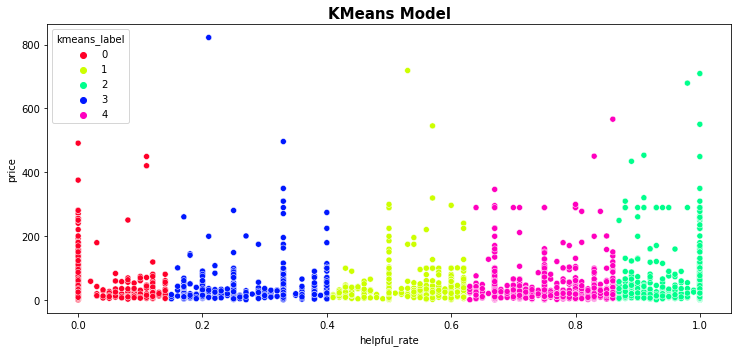

In [20]:

plt.figure(figsize =(20,5))
plt.subplot(1,2,1)
plt.title('KMeans Model',fontweight='bold',fontsize=15)
sns.scatterplot(d['helpful_rate'],d['price'],hue=d['kmeans_label'],palette = 'gist_rainbow')


plt.tight_layout()
plt.show()

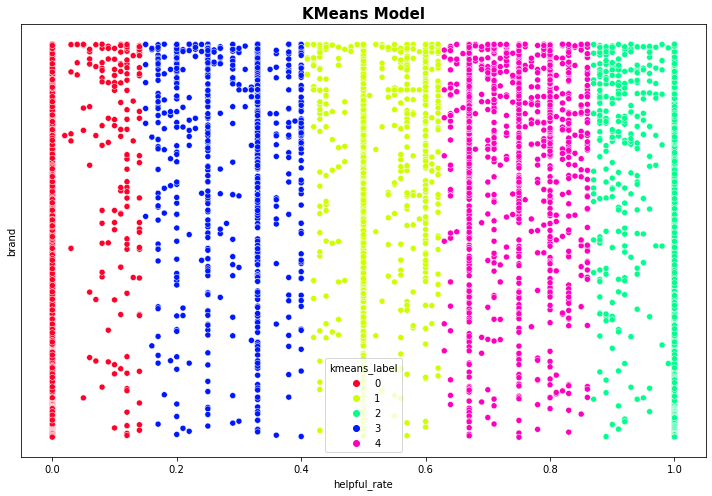

In [22]:
plt.figure(figsize =(10,7))
plt.title('KMeans Model',fontweight='bold',fontsize=15)
sns.scatterplot(d['helpful_rate'],d['brand'],hue=d['kmeans_label'],palette = 'gist_rainbow')
# disabling yticks by setting yticks to an empty list
plt.yticks([])
plt.tight_layout()
plt.show()

brands in each clusters represent the helpfulness of the reviews
red and pink clusters are least helpful
green are somwhat helpful
blue and yellow are most helpful

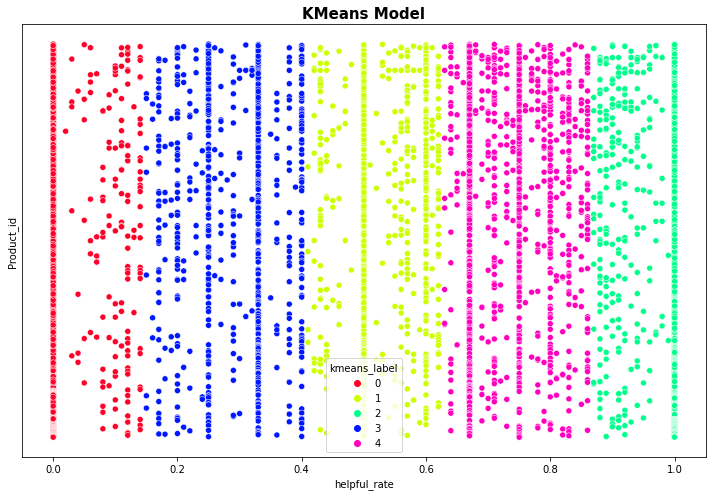

In [23]:
plt.figure(figsize =(10,7))
plt.title('KMeans Model',fontweight='bold',fontsize=15)
sns.scatterplot(d['helpful_rate'],d['Product_id'],hue=d['kmeans_label'],palette = 'gist_rainbow')
# disabling yticks by setting yticks to an empty list
plt.yticks([])
plt.tight_layout()
plt.show()

****************************************************************

In [24]:
cust1=d[d["kmeans_label"]==0]
print('Brands of Cluster 0 =', len(cust1))
print( cust1["brand"].values)
print("--------------------------------------------------------------------------------------------")
cust2=d[d["kmeans_label"]==1]
print('Brands of Cluster 1 =', len(cust2))
print( cust2["brand"].values)

print("---------------------------------------------------------------------------------------------")
cust3=d[d["kmeans_label"]==2]
print('Brands of Cluster 2 =', len(cust3))
print( cust3["brand"].values)

print("---------------------------------------------------------------------------------------------")
cust4=d[d["kmeans_label"]==3]
print('Brands of Cluster 3 =', len(cust4))
print(cust4["brand"].values)

print("---------------------------------------------------------------------------------------------")
cust5=d[d["kmeans_label"]==4]
print('Brands of Cluster 4 =', len(cust5))
print( cust5["brand"].values)

print("---------------------------------------------------------------------------------------------")

Brands of Cluster 0 = 4708
['Absonutrix Fucoxanthin Patch' 'Philips' 'Now Foods' ... 'Doc Johnson'
 'North American Healthcare' 'DR. Love']
--------------------------------------------------------------------------------------------
Brands of Cluster 1 = 1204
['Life Extension' 'Pledge' 'Vibrant Health' ... 'Ossur' 'Centrum'
 'Wet and Forget']
---------------------------------------------------------------------------------------------
Brands of Cluster 2 = 2098
['Urban Nutrition' 'Plus White' 'Screaming O' ... 'Donna Karan'
 '3 Point Products' 'Light Relief']
---------------------------------------------------------------------------------------------
Brands of Cluster 3 = 792
['Nalpac' 'Wahl' 'Adam &amp; Eve' 'Epulse' 'Natrol' 'K-Y'
 'Doctor&#39;s Best' 'Nature Made' 'Clubman Pinaud' 'Now Foods' 'Febreze'
 'IOWA SELECT HERBS LLC' 'Almased' 'Hi-Tech' 'Dr. Scholl&#39;s' 'Chia'
 'Now Foods' 'Nature&#39;s Secret' 'R.E.M. Spring' 'First Response'
 'Flents' 'Source Naturals' 'Magnum M5' 'Ga

In [25]:
cust1=d[d["kmeans_label"]==0]
print('Product id of Cluster 0 =', len(cust1))
print( cust1["Product_id"].values)
print("--------------------------------------------------------------------------------------------")
cust2=d[d["kmeans_label"]==1]
print('Product id of Cluster 1 =', len(cust2))
print( cust2["Product_id"].values)

print("---------------------------------------------------------------------------------------------")
cust3=d[d["kmeans_label"]==2]
print('Product id of Cluster 2 =', len(cust3))
print( cust3["Product_id"].values)

print("---------------------------------------------------------------------------------------------")
cust4=d[d["kmeans_label"]==3]
print('Product id of Cluster 3 =', len(cust4))
print(cust4["Product_id"].values)

print("---------------------------------------------------------------------------------------------")
cust5=d[d["kmeans_label"]==4]
print('Product id of Cluster 4 =', len(cust5))
print( cust5["Product_id"].values)

print("---------------------------------------------------------------------------------------------")

Product id of Cluster 0 = 4708
['B0059IU3TG' 'B001AJ6YS2' 'B000XPGPXS' ... 'B00BP314ZQ' 'B003FHZ78A'
 'B0016370GC']
--------------------------------------------------------------------------------------------
Product id of Cluster 1 = 1204
['B002AHJFG6' 'B003TKMFEM' 'B00014E01K' ... 'B00302N4P8' 'B002MY3O96'
 'B009QCP7XI']
---------------------------------------------------------------------------------------------
Product id of Cluster 2 = 2098
['B0013J2BQI' 'B000RH1TRE' 'B00AG4WH60' ... 'B0006V7Y8Y' 'B0055762AK'
 'B000GAAANG']
---------------------------------------------------------------------------------------------
Product id of Cluster 3 = 792
['B001SPCOQY' 'B001GQ3GEY' 'B0001FUWLQ' 'B003VS8NU2' 'B004H7GB9G'
 'B001P5HAJ8' 'B0019H1426' 'B005G4YCHW' 'B000GCSCSE' 'B0013OUML4'
 'B0048BIJHS' 'B000OAZDB2' 'B0015WUD0E' 'B00794LY82' 'B0039NN124'
 'B002R0FQB4' 'B0013OSNCE' 'B0006II74M' 'B001FXUTUM' 'B000052XHJ'
 'B002VKB4O8' 'B00020I51Y' 'B002E7NCLQ' 'B000GWG7TK' 'B002FK3B4U'
 'B0000DGBI

In [26]:

cust1=d[d["kmeans_label"]==0]
print('Title of Cluster 0 =', len(cust1))
print( cust1["title"].values)
print("--------------------------------------------------------------------------------------------")
cust2=d[d["kmeans_label"]==1]
print('Title of Cluster 1 =', len(cust2))
print( cust2["title"].values)

print("---------------------------------------------------------------------------------------------")
cust3=d[d["kmeans_label"]==2]
print('Title of Cluster 2 =', len(cust3))
print( cust3["title"].values)

print("---------------------------------------------------------------------------------------------")
cust4=d[d["kmeans_label"]==3]
print('Title of Cluster 3 =', len(cust4))
print(cust4["title"].values)

print("---------------------------------------------------------------------------------------------")
cust5=d[d["kmeans_label"]==4]
print('Title of Cluster 4 =', len(cust5))
print( cust5["title"].values)

print("---------------------------------------------------------------------------------------------")

Title of Cluster 0 = 4708
['Absonutrix Fucoxanthin Slim Patches - 30 Patches - Extreme Fat Burner - Most Advanced Formula'
 "Philips Norelco 7310 Men's Shaving System"
 'NOW Foods Neem Oil, 1-Fluid Ounce.' ...
 'WHITE NIGHTS VELVET TOUCH POCKET ROCKET WATERPROOF &amp; NEW HIGH INTENSITY SILVER BULLET VIBRATOR'
 'North American Healthcare JB5702 Adjustable Slimming Belt'
 '9&quot; Perfect Extension']
--------------------------------------------------------------------------------------------
Title of Cluster 1 = 1204
['Life Extension Advanced Oral Hygiene, Vegetarian Mint Lozenges, 60-Count'
 'Pledge Fabric Sweeper Rainshower, 1 Unit'
 'Vibrant Health Green Vibrance Superfood, Powder, 12.8 Ounce' ...
 'Ossur Foot-up - Drop Foot Brace - Large - Black'
 'Centrum Silver Women Multivitamin - 250 Tablets'
 'Wet and Forget 801064 .5 Gallon Weekly No Scrub Shower Spray, Vanilla']
---------------------------------------------------------------------------------------------
Title of Cluster 2 = 

In [27]:
cluster_df = d.groupby(['kmeans_label'],as_index=False).mean()

In [28]:
cluster_df

,kmeans_label,salesRank,price,overall,unixReviewTime,Helpful,Not_helpful,helpful_rate,neg,neu,pos,polarity,word_count
0,0,71840.474724,22.052530,1.0,1.373673e+09,0.054376,1.188828,0.003507,0.112570,0.805161,0.082256,-0.087102,52.793118
1,1,42131.766611,27.030930,1.0,1.347046e+09,3.674419,3.305648,0.519992,0.101049,0.811353,0.087595,-0.031806,77.569767
2,2,73176.627741,29.799395,1.0,1.352980e+09,8.195901,0.480458,0.988923,0.099727,0.818243,0.082037,-0.063656,77.232602
3,3,37752.616162,29.221250,1.0,1.340846e+09,2.200758,5.612374,0.294129,0.102696,0.806322,0.090999,-0.046099,69.828283
4,4,43356.256260,31.316302,1.0,1.334559e+09,9.738731,3.092654,0.736786,0.099067,0.820463,0.080454,-0.063561,93.125209


In [29]:
import seaborn as sb

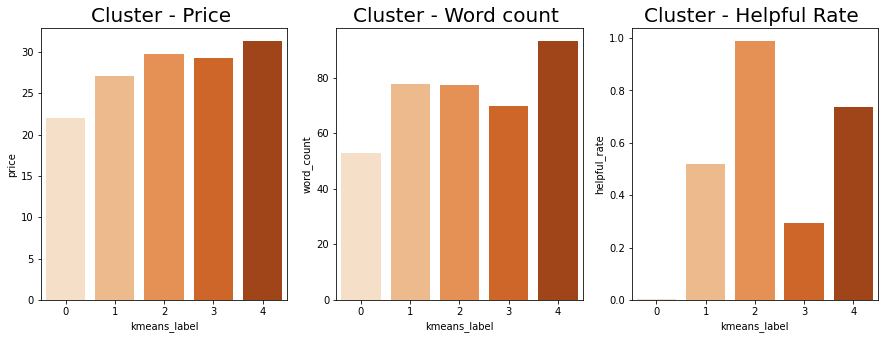

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Cluster - Price ',fontsize = 20 ,fontweight = 10 )
sb.barplot(x='kmeans_label',y='price',data=cluster_df,palette='Oranges')
plt.subplot(132)
plt.title('Cluster - Word count ',fontsize = 20 ,fontweight = 10 )
sb.barplot(x='kmeans_label',y='word_count',data=cluster_df,palette='Oranges')
plt.subplot(133)
plt.title('Cluster - Helpful Rate ',fontsize = 20 ,fontweight = 10 )
sb.barplot(x='kmeans_label',y='helpful_rate',data=cluster_df,palette='Oranges')
# plt.subplot(144)
# plt.title('Cluster - Helpful_rate ')
# sb.barplot(x='kmeans_label',y='helpful_rate',data=cluster_df,palette='Oranges')
plt.show()

*************************************